In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from utils import fit_bootstrap, calc_sup_inf, mydiff
from matplotlib import gridspec
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
def sigmoid(x, pars):
    pendenza = pars[0]
    massimo = pars[1]
    flesso = pars[2]
    return massimo / (1 + np.exp(-(x-flesso)*pendenza)) 
def exp(x, p0, p1=None, p2=None):
    if p1 is None and p2 is None:
        return p0[0]*np.exp((x-p0[1])/p0[2])
    else:
        return p0*np.exp((x-p1)/p2)

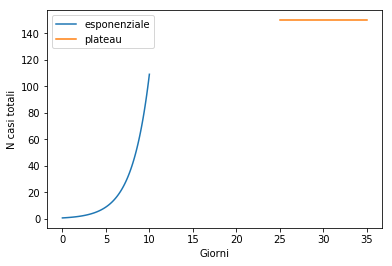

In [3]:
x = np.linspace(0, 10, 100)

y = 2*np.exp((x-2)/2)

x2 = np.linspace(25, 35, 100)

y2 = 150* np.ones_like(x2)

plt.plot(x,y, label="esponenziale")
plt.plot(x2,y2, label = "plateau")
plt.ylabel("N casi totali")
plt.xlabel("Giorni")
plt.legend()

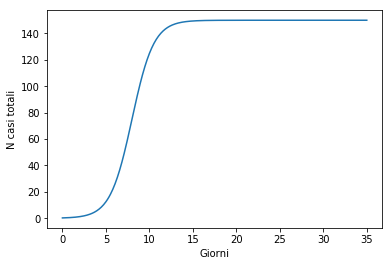

In [4]:
x = np.linspace(0, 35, 400)
y = sigmoid(x, [0.8, 150, 8])
plt.ylabel("N casi totali")
plt.xlabel("Giorni")
plt.plot(x, y)

# cerchiamo punto di flesso


In [5]:
date_limite = pd.to_datetime(["2020-03-12T20:00", "2020-03-13T20:00", "2020-03-14T20:00"])
# il numero di giorni da escludere per valutare il flesso
n_giorni2exclude = 3
df_raw = pd.read_csv("COVID-19/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv")
df_raw['data'] = pd.to_datetime(df_raw['data'])
date_limite = df_raw['data'].values[-4:] + np.timedelta64('4', 'h')


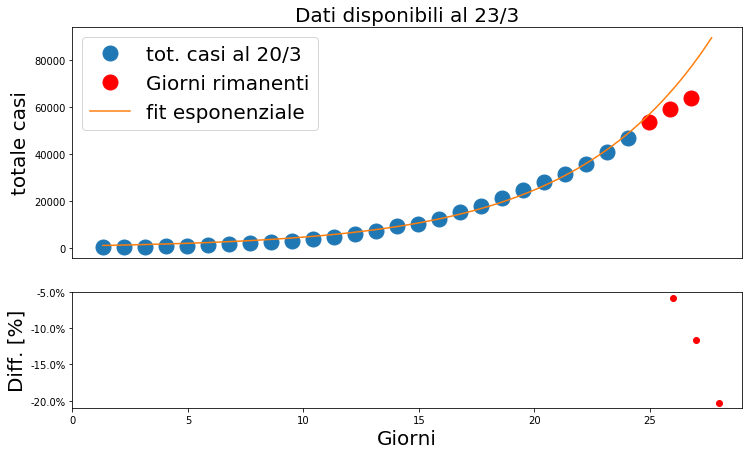

-------------------


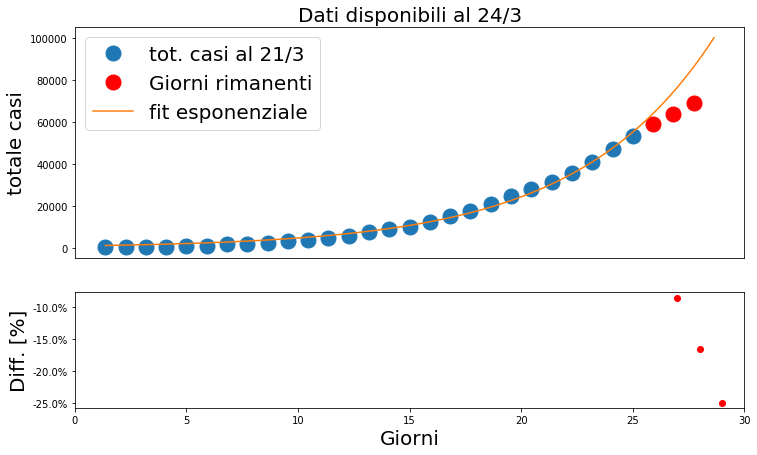

-------------------


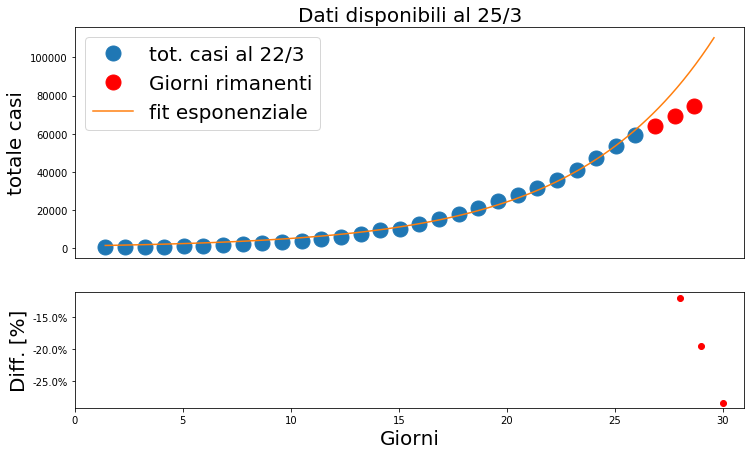

-------------------


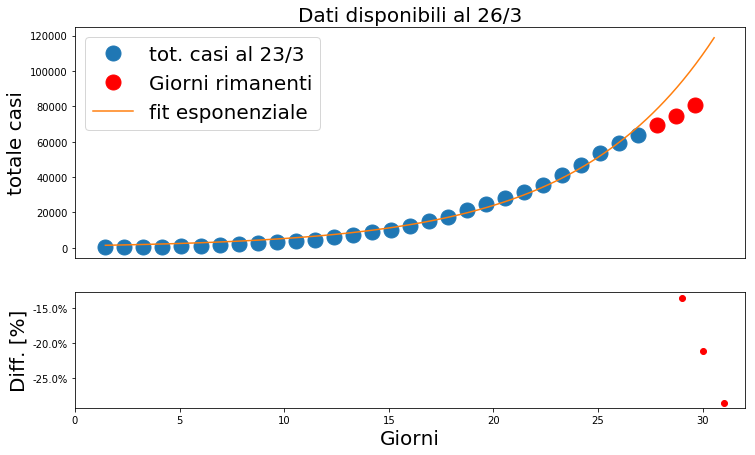

-------------------


In [7]:
for data_limite in date_limite:
    plt.figure(figsize=(12,7))
    gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 
    plt.subplot(gs[0])
    df=df_raw.copy()
    df=df[df['data']<data_limite]
    df.index=df['data']
    pstart = [ 8.79236555, -23.40339708,   5.43692378]
    x4fit = np.arange(len(df) - n_giorni2exclude)
    y4fit = df['totale_casi'].values[:-n_giorni2exclude]
    plt.plot(x4fit, y4fit, "o", markersize=15, label=f"tot. casi al {df.index[-n_giorni2exclude-1].day}/{df.index[-n_giorni2exclude-1].month}")
    # pfit, perr = fit_bootstrap(pstart, x4fit, y4fit, function=exp, n_trials=1000)
    pfit, pcov = curve_fit(exp, x4fit, y4fit, p0=pstart)

    x_rim = np.arange(n_giorni2exclude)+1 + x4fit[-1]
    y_rim = df['totale_casi'].values[-n_giorni2exclude:]
    plt.plot(x_rim, y_rim, 'o', markersize=15, label = "Giorni rimanenti", color='r')


    x = np.linspace(0, len(df), 100)
    y = exp (x, pfit)
    #ysim_sup, ysim_inf = calc_sup_inf(exp, x, pfit, perr)
    #plt.fill_between(x, ysim_sup, ysim_inf, facecolor="red", alpha = 0.2)

    plt.plot(x,y, label = "fit esponenziale")


    plt.ylabel("totale casi", size=20)
    plt.xlabel("")
    plt.xticks([])
    plt.title(f"Dati disponibili al {df.index[-1].day}/{df.index[-1].month}", size=20)
    plt.legend(fontsize=20)
    
    ## plot inferiore
    sbp = plt.subplot(gs[1])
    differenza = 100*(y_rim-exp(x_rim, pfit))/y_rim
    plt.plot(x_rim, differenza, 'o', color='r')
    plt.xlim(0, x[-1])
    sbp.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=1))
    plt.ylabel("Diff. [%]", size=20)
    plt.xlabel("Giorni", size=20)
    plt.show()
    print ("-------------------")
